# New York Airbnb Price Prediction

## Abstract

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.

## Brief Description of the Data

The dataset was taken from [Kaggle](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) and it contains the 48895 observations of Airbnb listings in New York City in 2019 and 16 features as follows:

| Column | Description |
| --- | --- |
| id |  Listing ID |
| name |  Name of the listing |
| host_id |  Host ID |
| host_name | Name of the host |
| neighbourhood_group | Location |
| neighbourhood | Area |
| latitude | Latitude coordinates |
| longitude | Longitude coordinates |
| room_type | Listing space type |
| price | Price in dollars |
| minimum_nights | Amount of nights minimum |
| number_of_reviews | Number of reviews |
| last_review | Latest review |
| reviews_per_month | Number of reviews per month |
| calculated_host_listings_count | Amount of listing per host |
| availability_365 | Number of days when listing is available for booking |

## Breakdown of this notebook:

1. Importing Libraries
2. Loading the dataset
3. Examination of the data summary, missing and duplicated values
4. Data Cleaning, EDA and Feature Engineering
  - Perform data cleaning: drop unnecessary columns and replace or remove missing and duplicated values
  - Provide the summary statistics of numerical and categorical features
  - Provide the distribution of numerical features
  - Identify, modify or remove outliers based on summary statistics or distribution of each feature
  - Remove all the listings with a price of 0$ (promotion/bad data)
  - Provide and analyze the distribution of categorical features
  - Perform final data cleaning: drop the features that will not take part in the prediction
  - Encode the remaining categorical features
  - Analyze correlation between features using heatmap

4. Modeling and Prediction
  - Define the independent variables and dependent variable
  - Split the data into training set and testing set
  - Use three models for training: Linear regression, Lasso regression and Ridge regression
  - Use R2 score and MSE to measure model performance
  - Fit the whole training data into the best model, then make prediction using test data and assess accuracy
  - Conclusion

## 1. Importing Libraries

In [1]:
%matplotlib inline
%config InlineBackend.figure_formats = ['retina']

import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('fast')

import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='tab10')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import Pipeline

from sklearn.metrics import r2_score, mean_squared_error

import warnings as wn
wn.filterwarnings('ignore')

## 2. Loading the dataset

In [2]:
dir_path = os.path.abspath('AB_NYC_2019.csv')
data = pd.read_csv(dir_path)

## 3. Data Summary, Missing and Duplicated Values

In [3]:
# Examine the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [4]:
# Check for the null values
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [5]:
# Check for the duplicated values
data.duplicated().sum()

0

## 4. Data Cleaning, EDA, and Feature Engineering

### Data Cleaning

In [6]:
# Drop unnecessary columns
data.drop(['id', 'name', 'host_id', 'host_name', 'latitude', 'longitude', 'last_review'], axis=1, inplace=True)

In [7]:
# Replace the 'reviews per month' by zero
data.fillna({'reviews_per_month': 0}, inplace=True)

In [8]:
# Confirm that there are no missing values
data.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

### Summary Statistics

In [9]:
# Examine the summary statistics of the numerical features
data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,48895.0,152.720687,240.154170,0.0,69.00,106.00,175.00,10000.0
minimum_nights,48895.0,7.029962,20.510550,1.0,1.00,3.00,5.00,1250.0
number_of_reviews,48895.0,23.274466,44.550582,0.0,1.00,5.00,24.00,629.0
reviews_per_month,48895.0,1.090910,1.597283,0.0,0.04,0.37,1.58,58.5
calculated_host_listings_count,48895.0,7.143982,32.952519,1.0,1.00,1.00,2.00,327.0
availability_365,48895.0,112.781327,131.622289,0.0,0.00,45.00,227.00,365.0


In [10]:
# Examine the summary statistics of the categorical features
data.describe(include=np.object).T

,count,unique,top,freq
neighbourhood_group,48895,5,Manhattan,21661
neighbourhood,48895,221,Williamsburg,3920
room_type,48895,3,Entire home/apt,25409


### Distribution of Numerical Features

In [11]:
# Create a copy of the original data
df = data.copy()

In [12]:
# Get the numerical features
num_cols = df.select_dtypes(exclude=np.object)

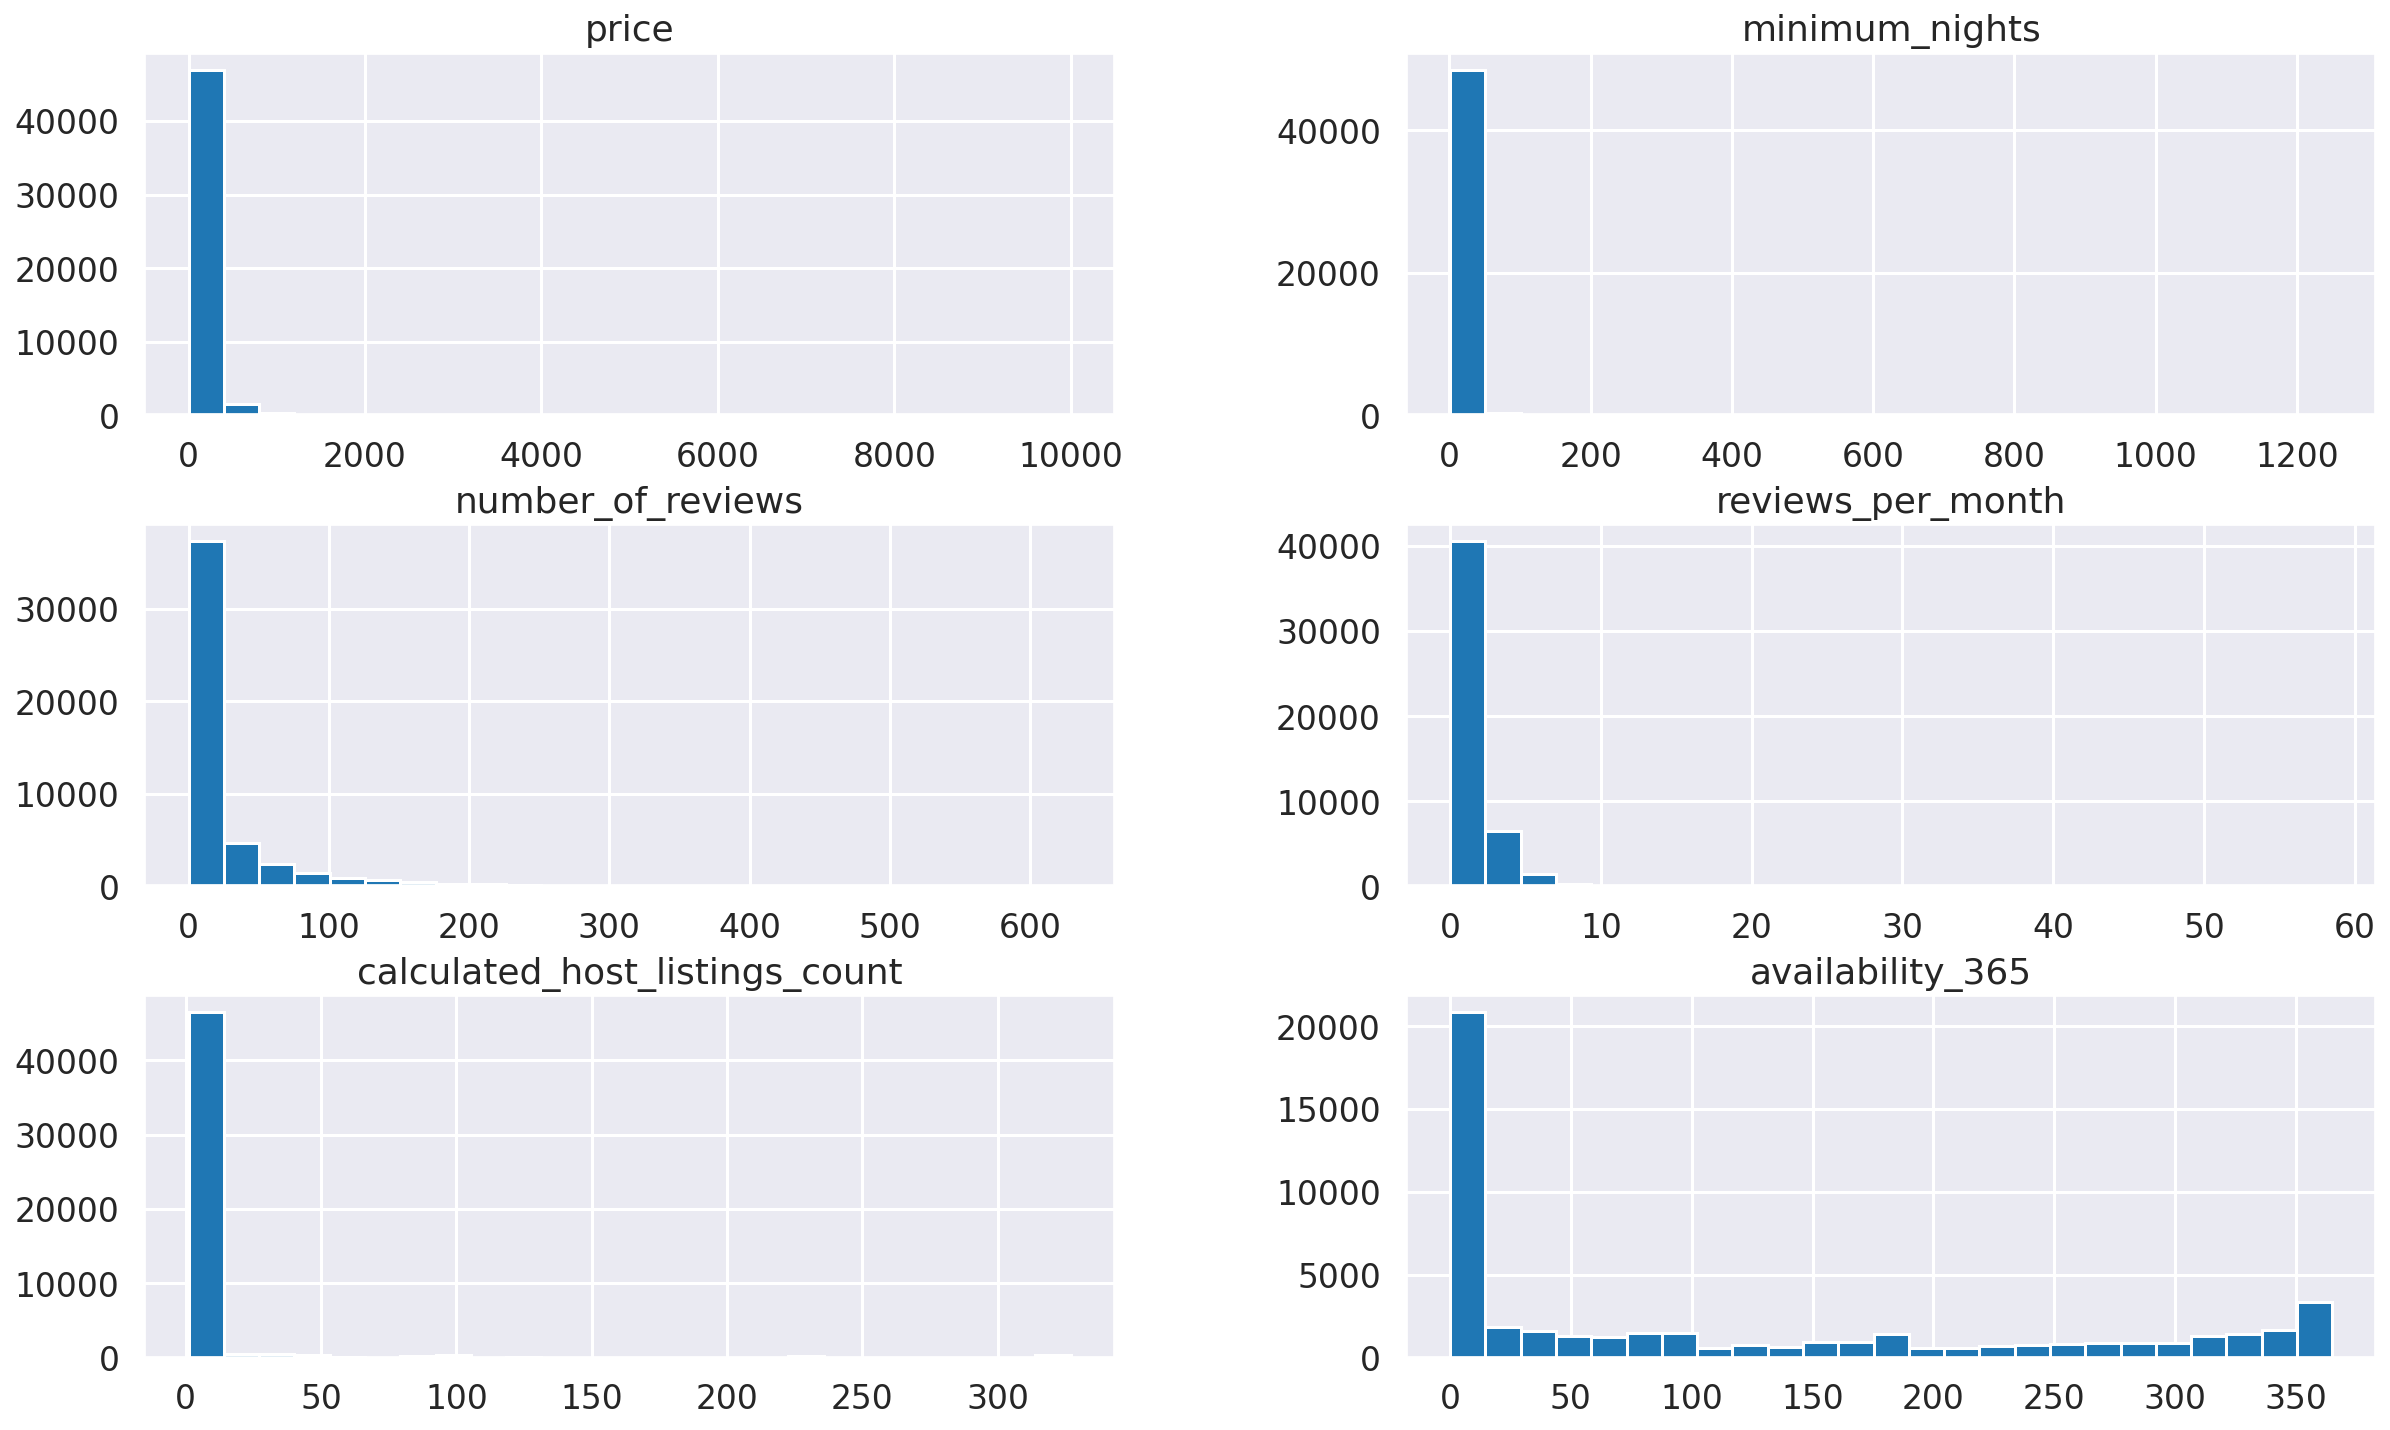

In [13]:
# Distribution of numerical features
h = num_cols.hist(bins=25, figsize=(20, 12))

- The plots above clearly show that there are outliers in each of the features.

### Outliers Handling

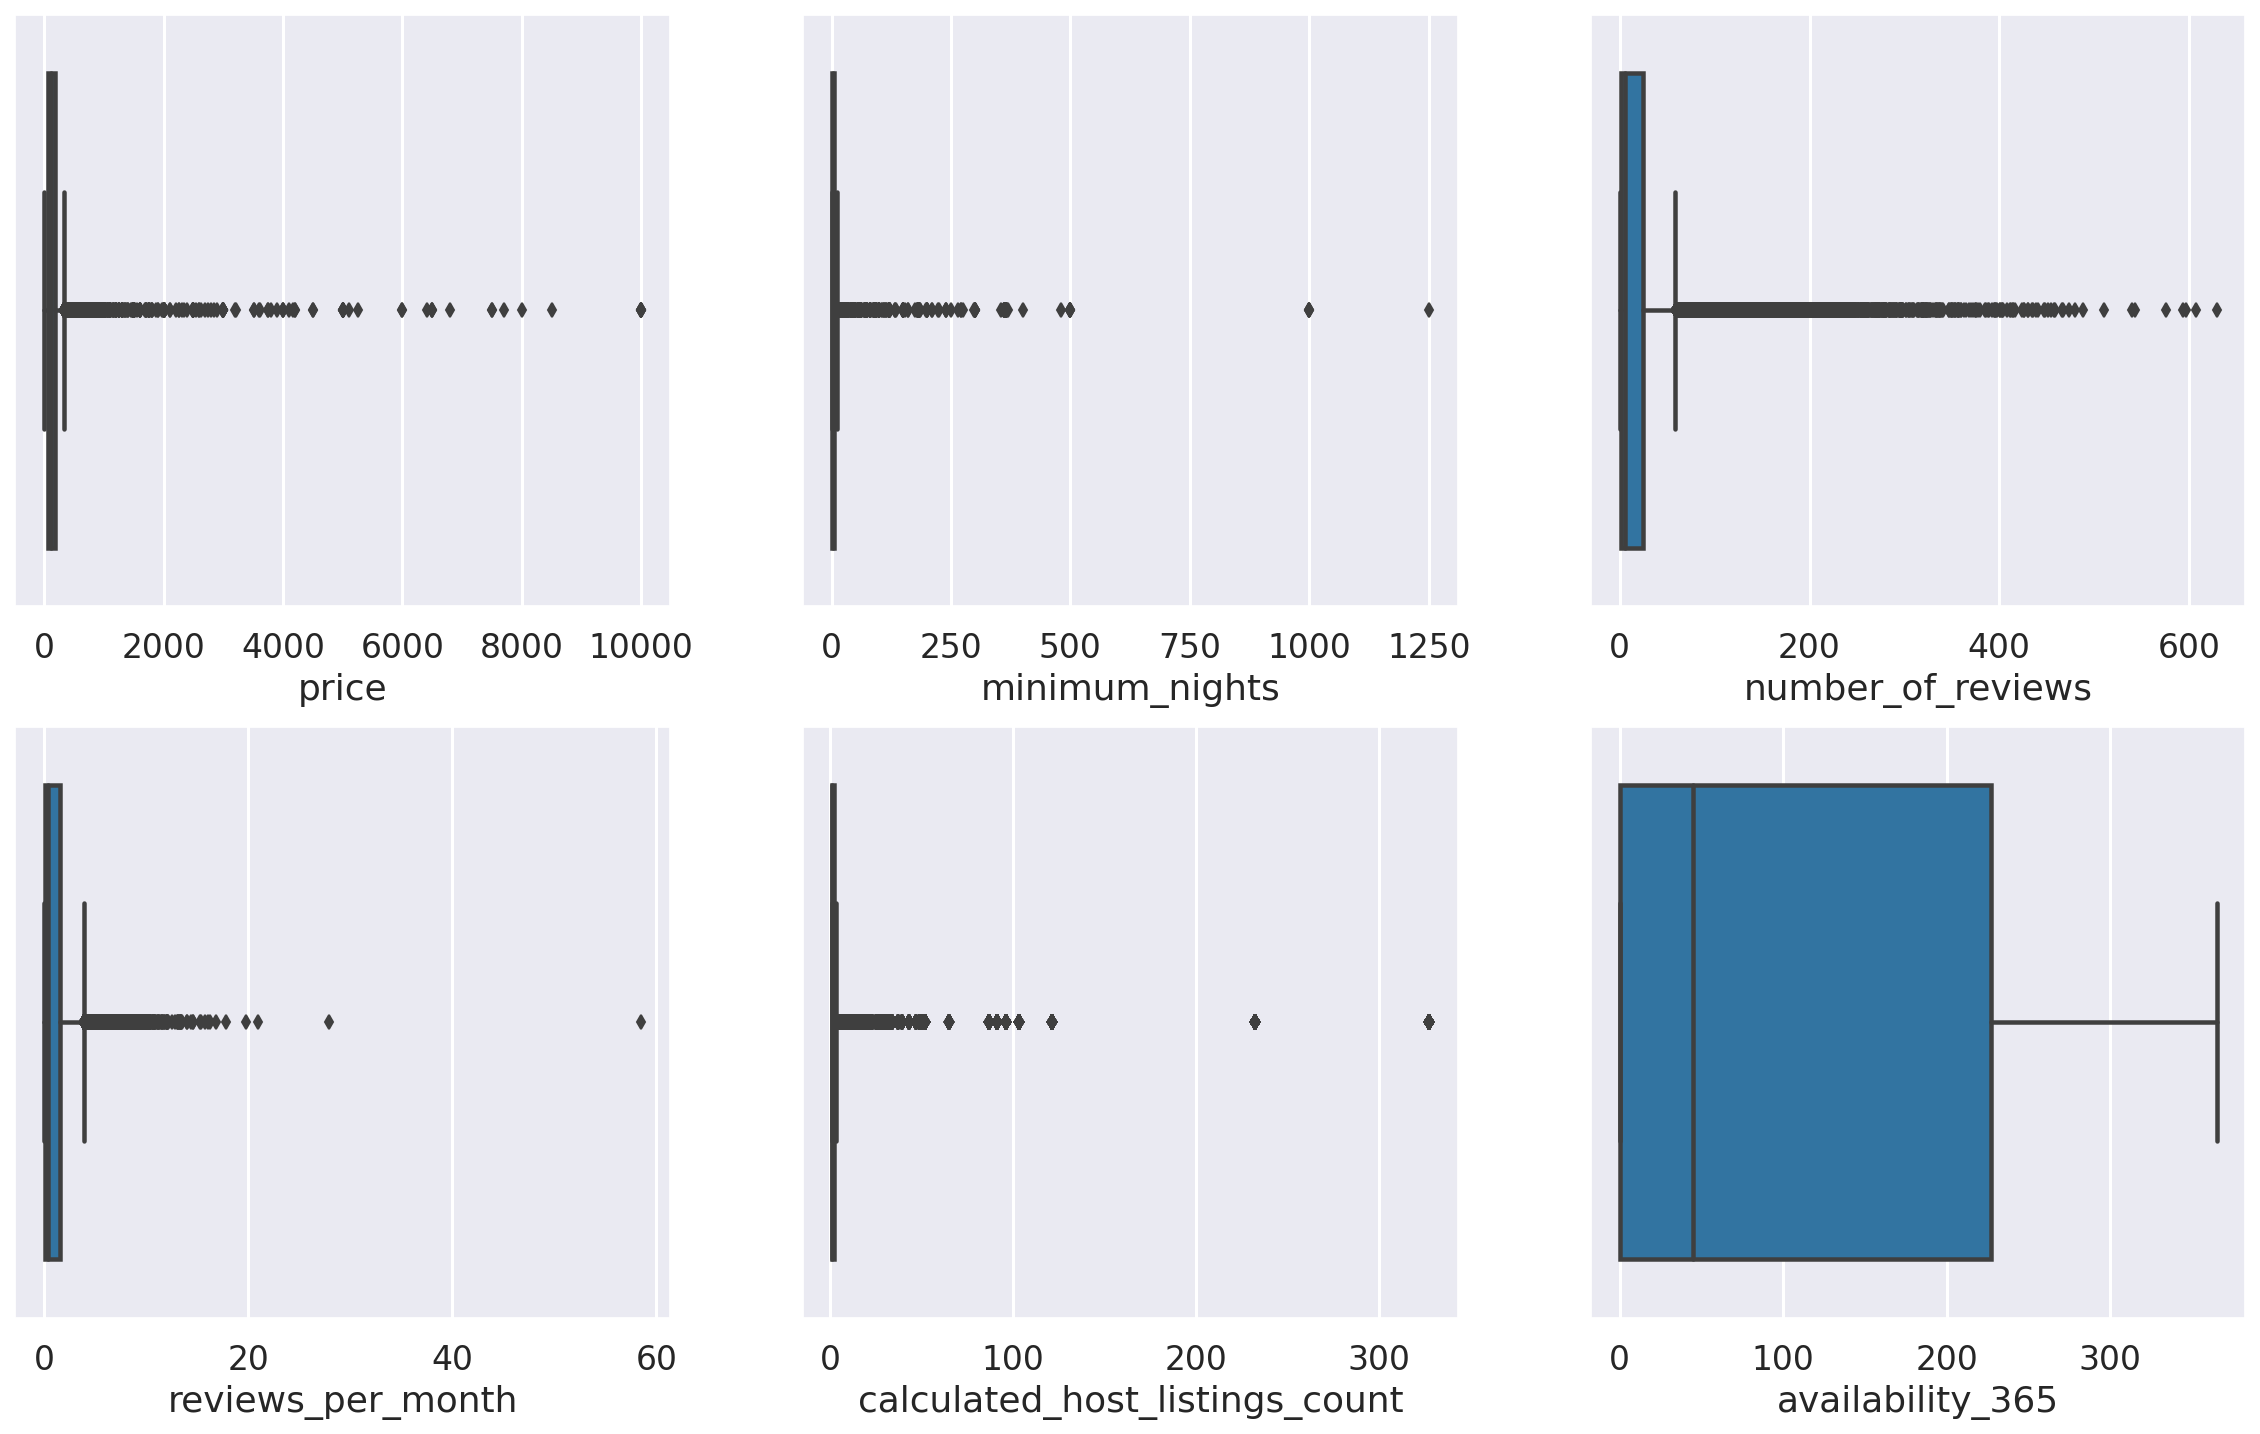

In [14]:
# Visualize the numerical features to find outliers
plt.figure(figsize=(20, 12))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data=df, x=col)

In [15]:
# Use the 1.5 IQR rule to find outliers
def bounds(x):
    '''
    This funciton finds the lower and upper bounds for outliers in an array using the
    1.5IQR rule
    Input: x(array)
    Output: IQR, lower bound, upper bound
    '''
    q1 = np.quantile(x, 0.25)
    q3 = np.quantile(x, 0.75)
    iqr = q3 - q1

    # Finding upper and lower whiskers
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    
    return [iqr, lower, upper]

In [16]:
for col in num_cols:
    # Using the 1.5 IQR rule to find outliers
    (iqr, lower, upper) = bounds(df[col])
    # Adjust values
    df[col] = df[col].apply(lambda x: upper if x > upper else (lower if x < lower else x))

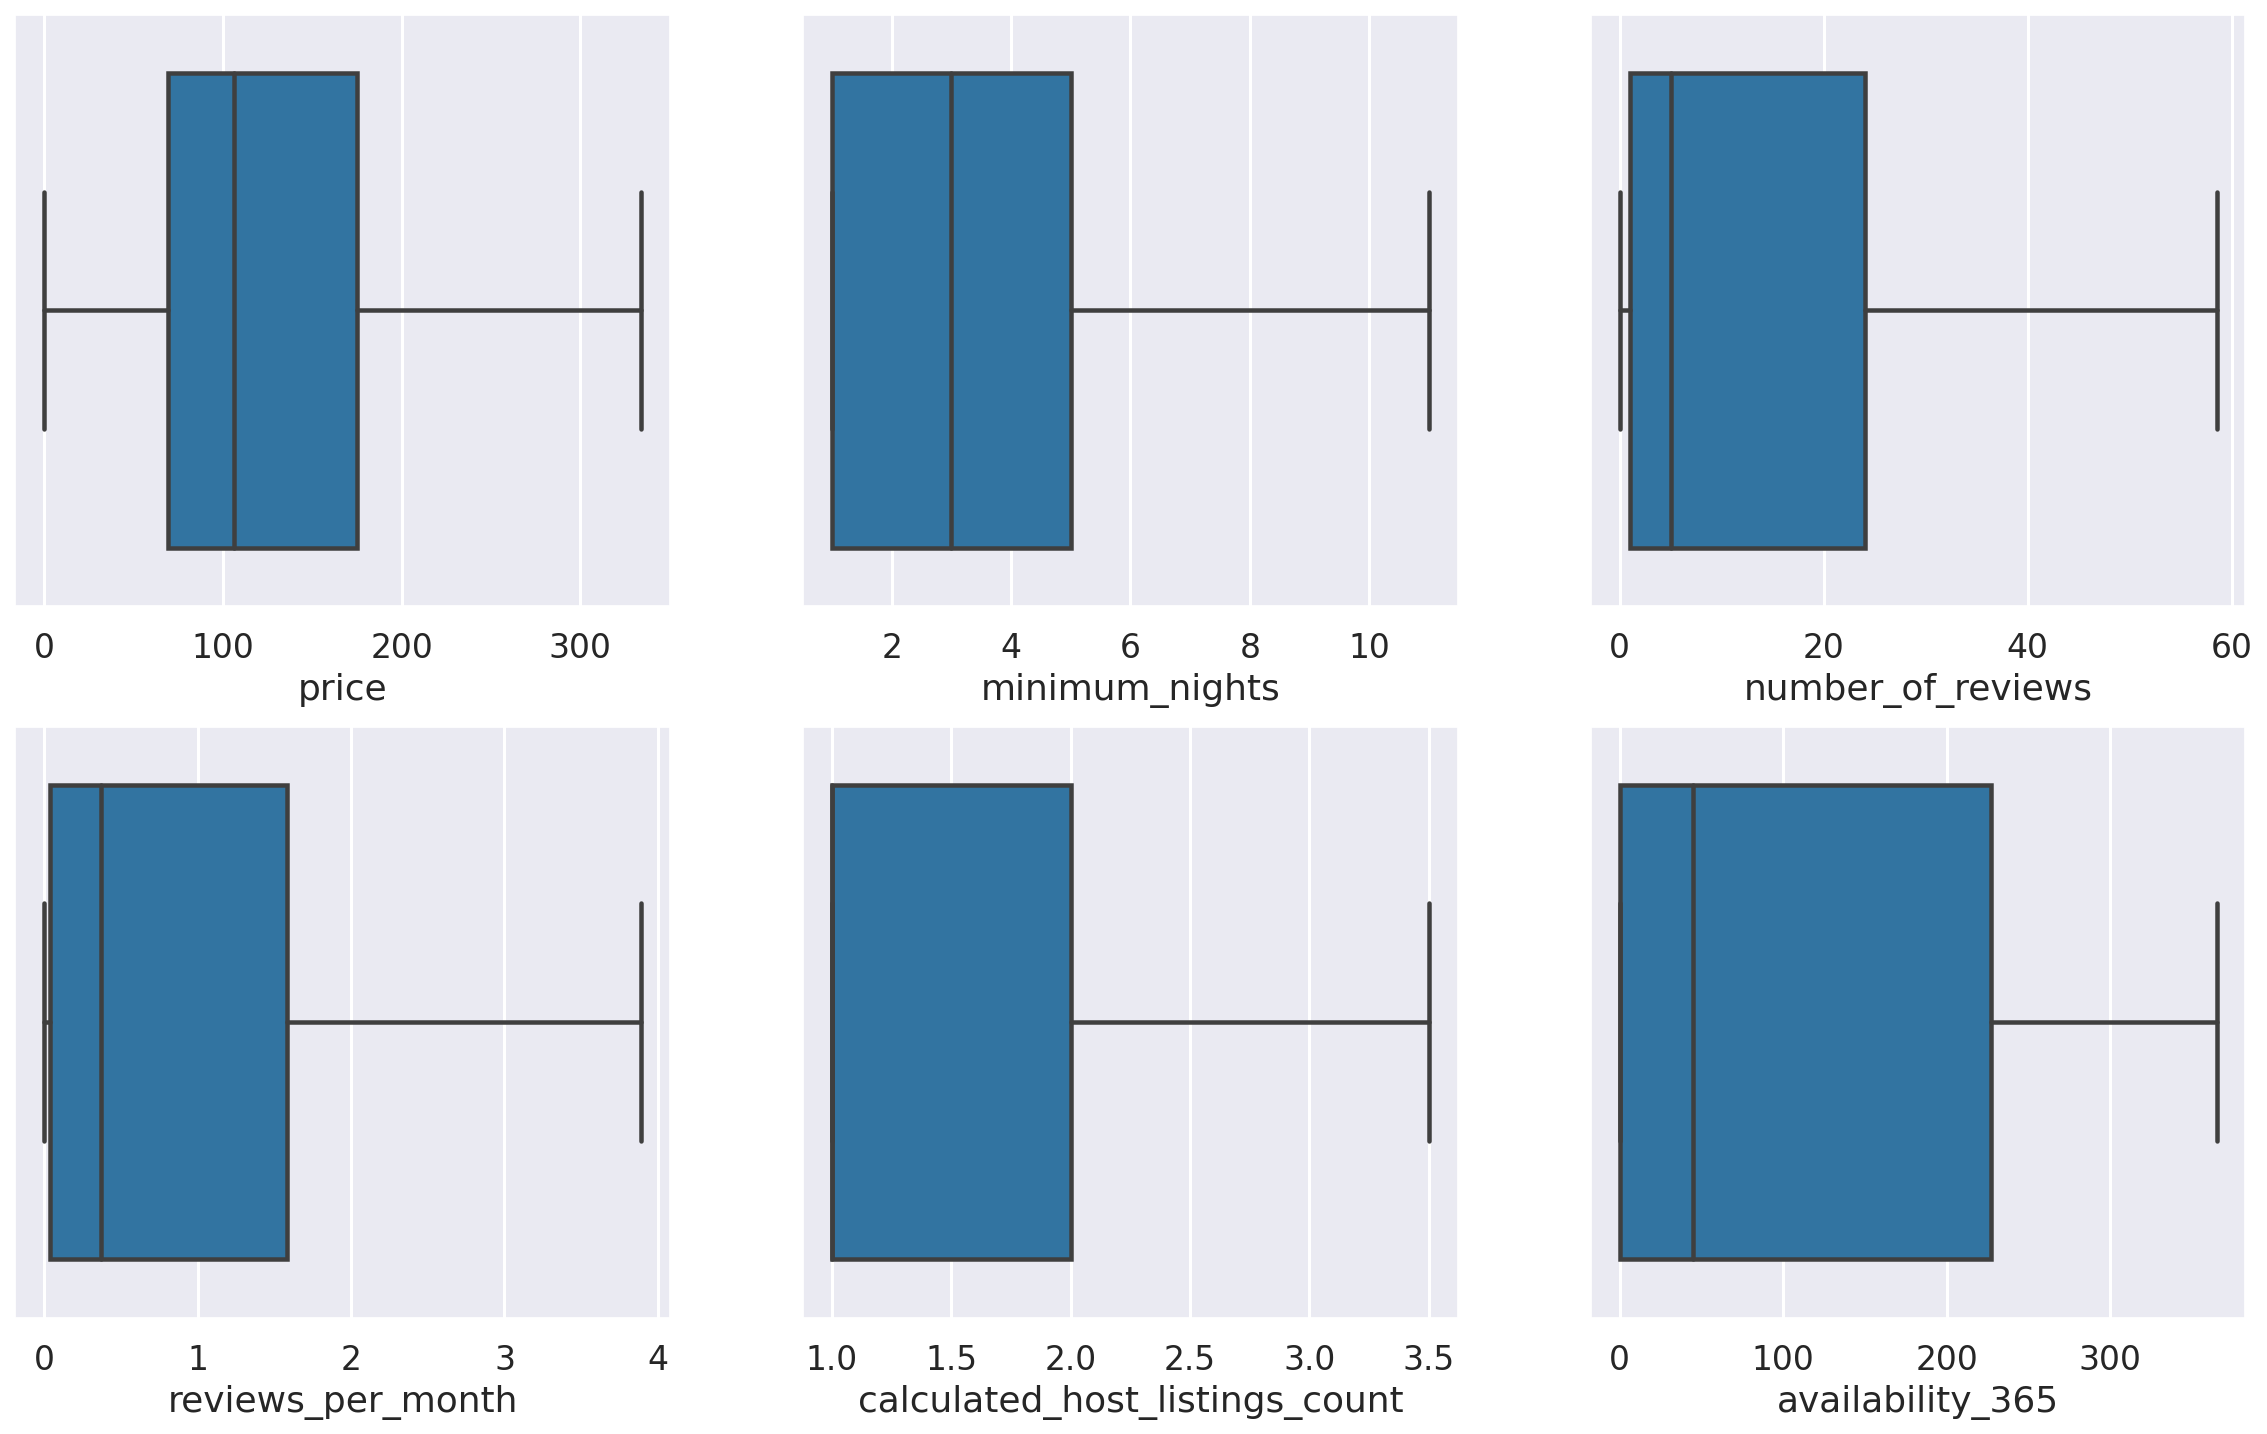

In [17]:
# Confirm that there are no more outliers in the numerical features
plt.figure(figsize=(20, 12))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(df[col])

### Target Feature Handling

In [18]:
# Check how many hosts have listed a price of 0,00$
df[df.price == 0].value_counts().sum()

11

In [19]:
# Remove all the listings with a price of 0,00$
df.drop(df[df['price'] == 0].index, axis=0, inplace=True)

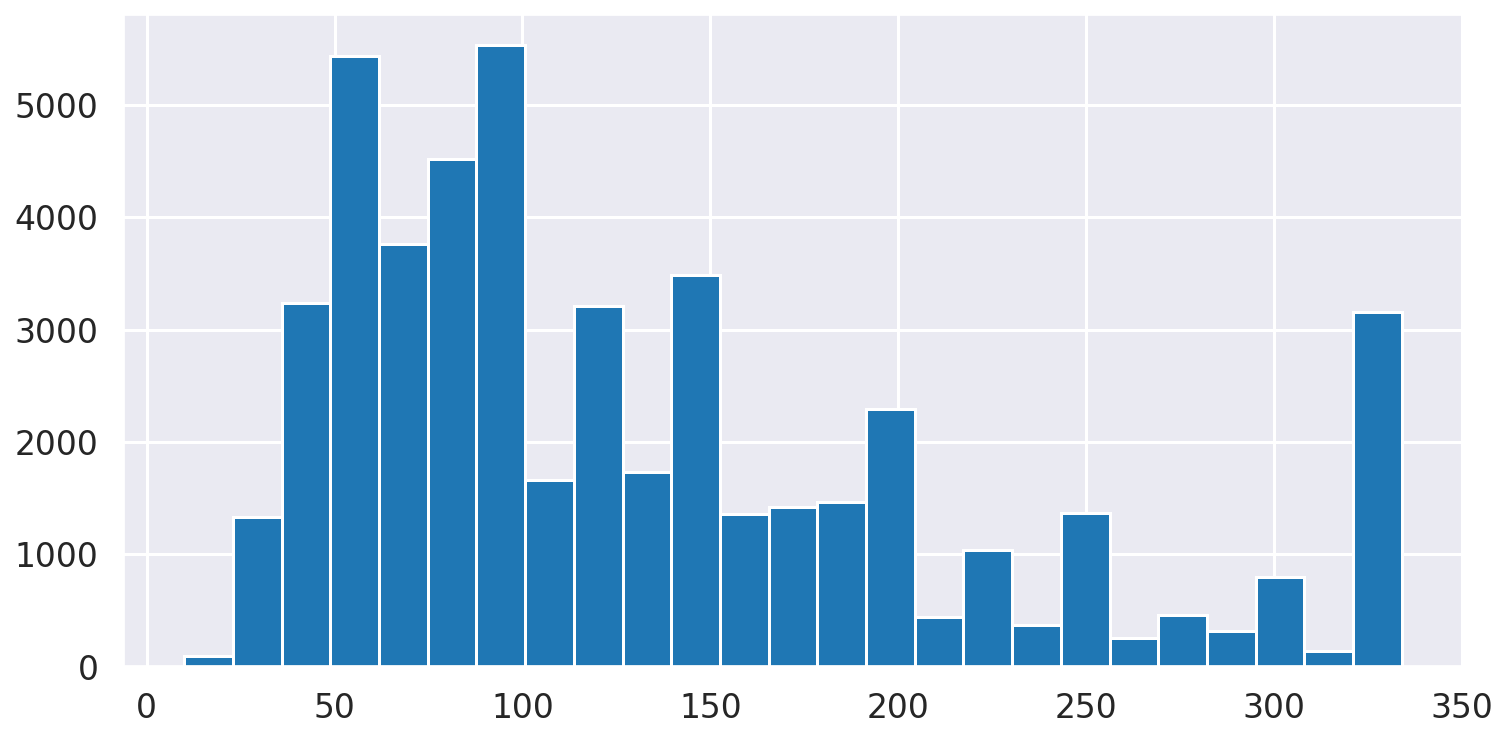

In [20]:
# Distribution of the price after outliers and feature handling
h = df['price'].hist(bins=25, figsize=(12, 6))

### Distribution of Categorical Features

In [21]:
# Get the categorical features
cat_cols = df.select_dtypes(include=np.object)

In [22]:
# Examine the value counts of the categorical features
for col in cat_cols:
    print(f'{cat_cols[col].value_counts()}\n')

Manhattan        21660
Brooklyn         20095
Queens            5666
Bronx             1090
Staten Island      373
Name: neighbourhood_group, dtype: int64

Williamsburg          3919
Bedford-Stuyvesant    3710
Harlem                2658
Bushwick              2462
Upper West Side       1971
                      ... 
Woodrow                  1
Richmondtown             1
Willowbrook              1
New Dorp                 1
Fort Wadsworth           1
Name: neighbourhood, Length: 221, dtype: int64

Entire home/apt    25407
Private room       22319
Shared room         1158
Name: room_type, dtype: int64



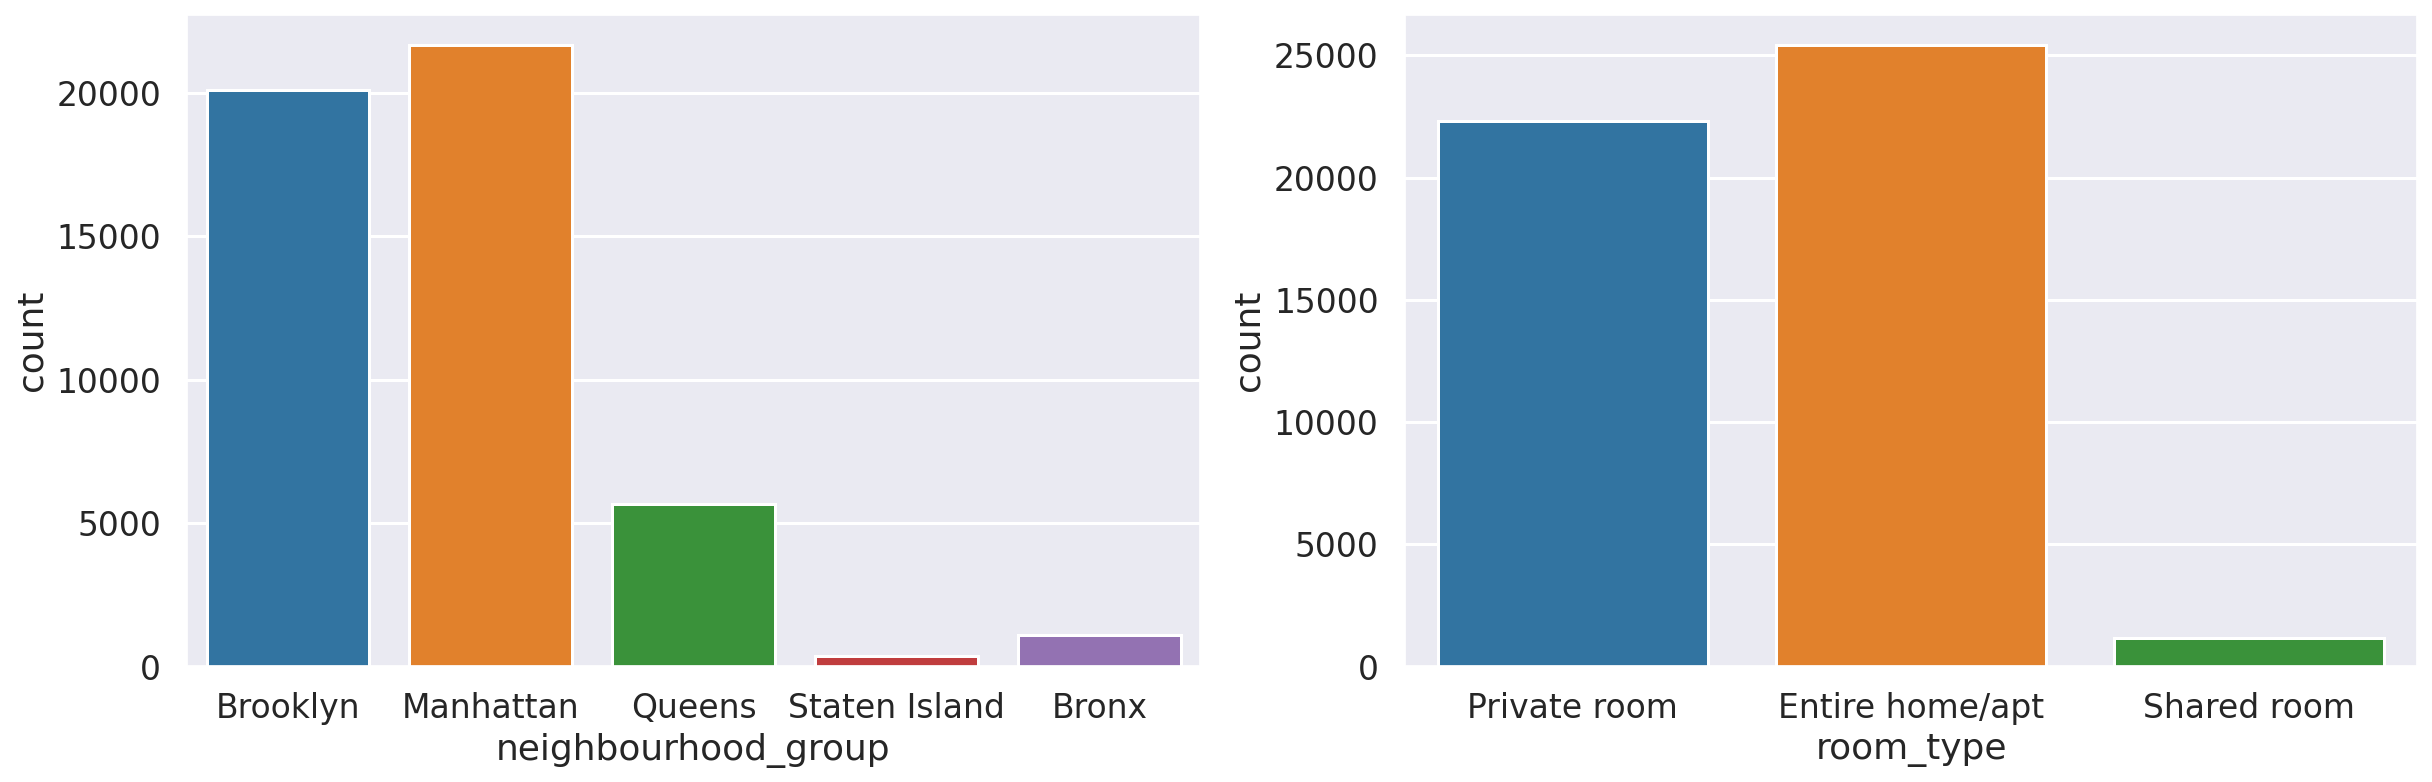

In [23]:
# Visualize the neighbourhood_group and room_type distributions
plt.figure(figsize=(20, 6))
for i, col in enumerate(df[['neighbourhood_group', 'room_type']]):
    plt.subplot(1, 2, i+1)
    sns.countplot(data=df, x=col)

In [24]:
# Examine the average listing price by the neighbourhood_group
df.groupby('neighbourhood_group')['price'].mean()

neighbourhood_group
Bronx             82.380734
Brooklyn         113.574720
Manhattan        164.668790
Queens            93.186904
Staten Island     94.485255
Name: price, dtype: float64

In [25]:
# Examine the average listing price by the room_type
df.groupby('room_type')['price'].mean()

room_type
Entire home/apt    180.222380
Private room        82.813343
Shared room         64.614853
Name: price, dtype: float64

In [26]:
# Check how many heighbourhoods have listed less than 500 times
(df['neighbourhood'].value_counts() < 500).sum()

197

In [27]:
# Combine all heighbourhoods that have listed less than 500 times to one category 'Others'
cnt = df['neighbourhood'].value_counts()
others = cnt[cnt < 500].index.to_list()
df['neighbourhood'].replace(others, 'Others', inplace=True)

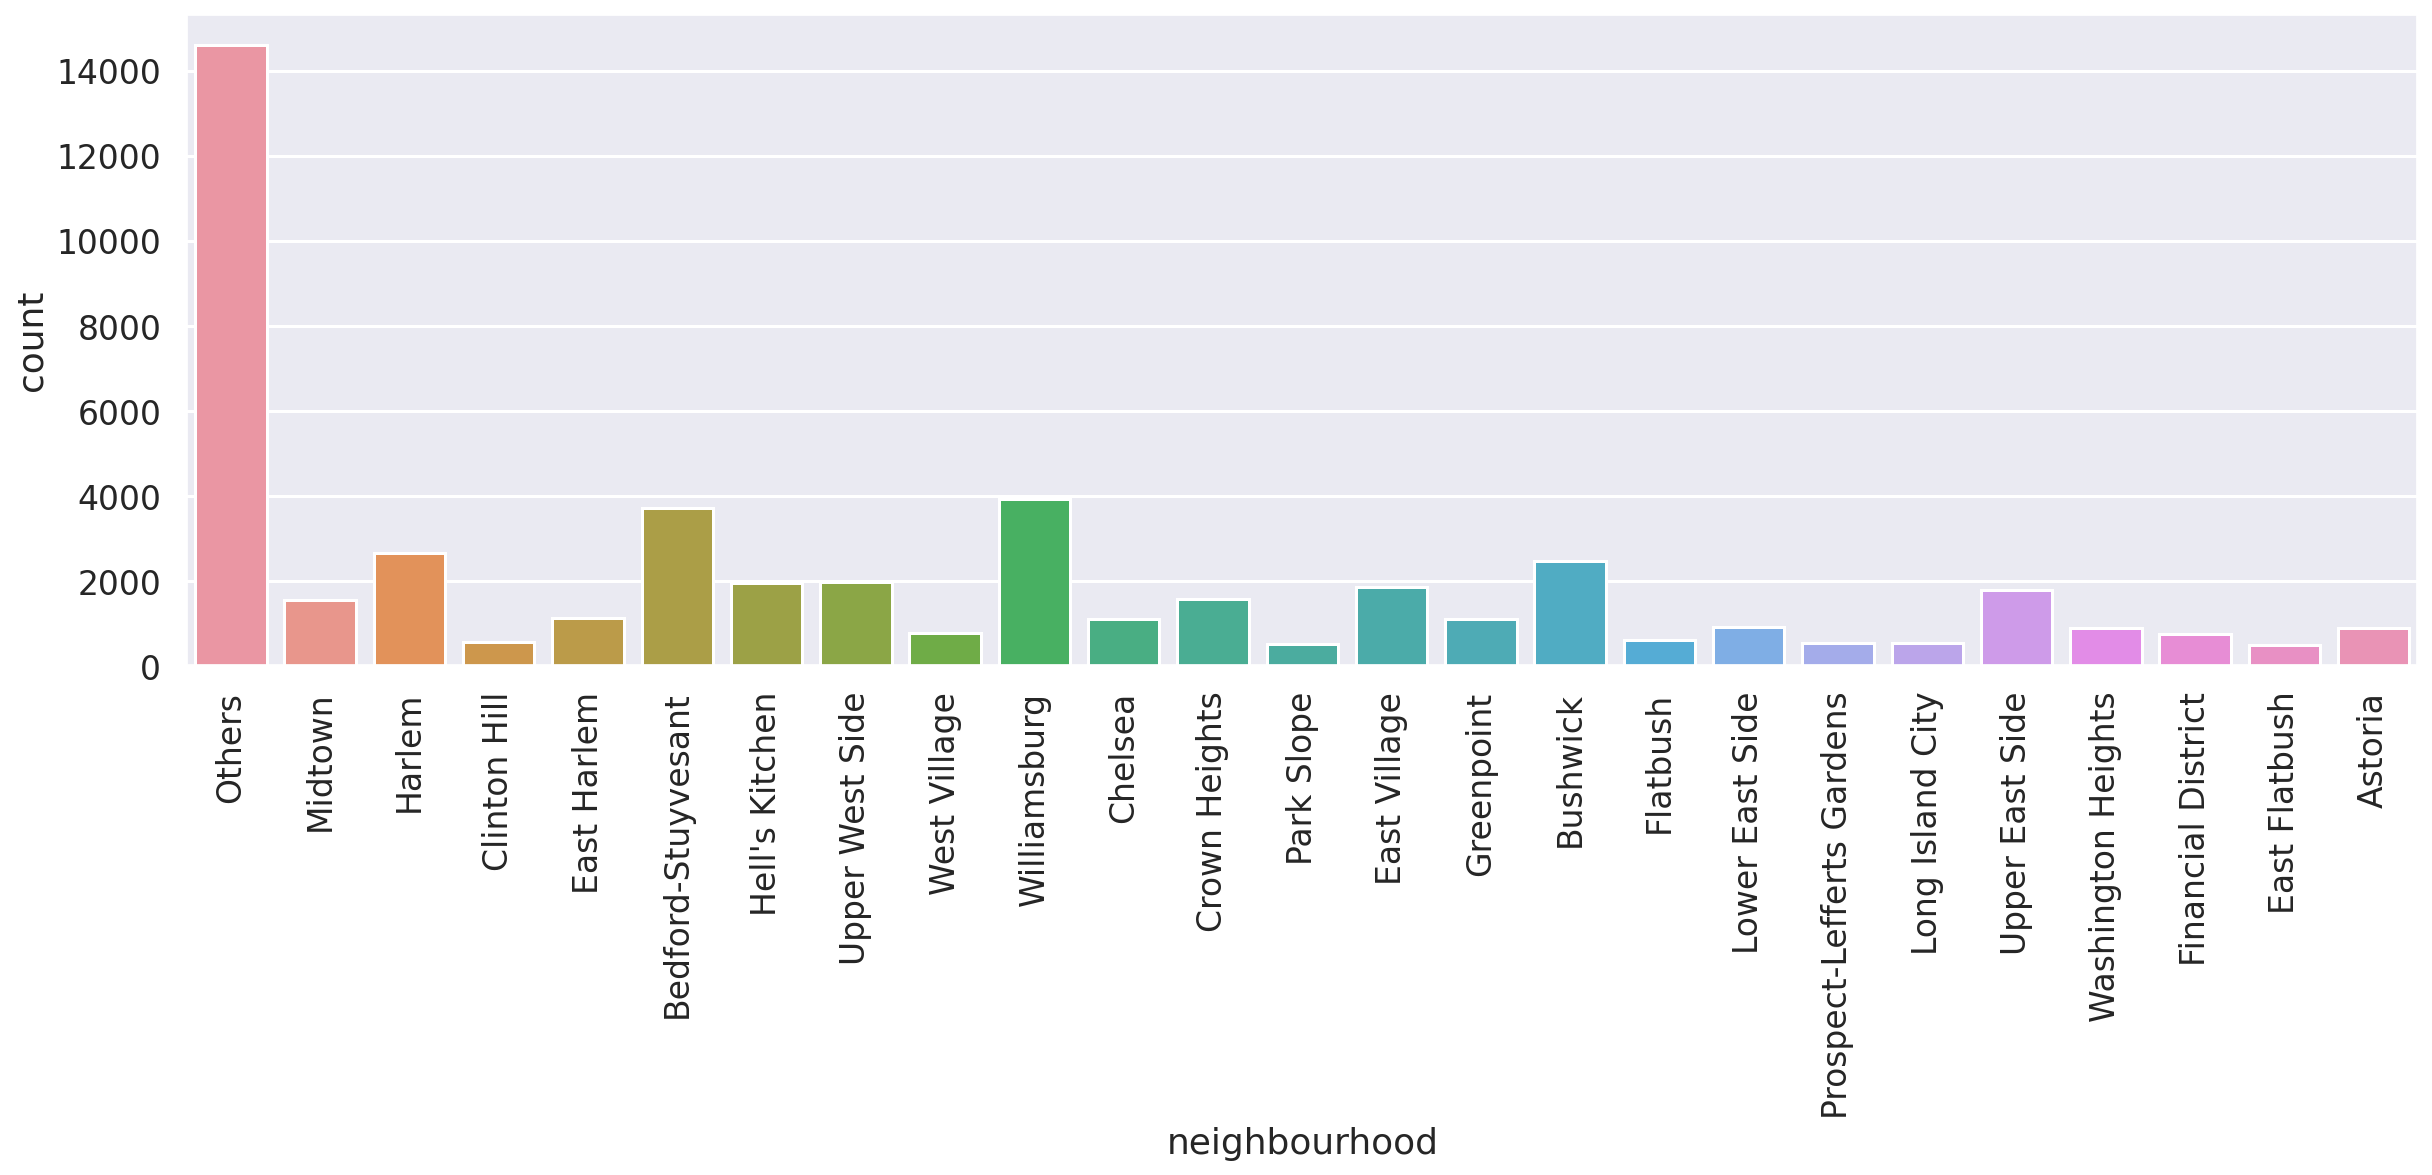

In [28]:
# Visualize the neighbourhood distribution
plt.figure(figsize=(20, 6))
plt.xticks(rotation=90)
cp = sns.countplot(data=df, x='neighbourhood')

In [29]:
# Examine the distribution of the most popular neighbourhoods
df.groupby('neighbourhood_group')['neighbourhood'].value_counts()

neighbourhood_group  neighbourhood            
Bronx                Others                       1090
Brooklyn             Others                       4592
                     Williamsburg                 3919
                     Bedford-Stuyvesant           3710
                     Bushwick                     2462
                     Crown Heights                1564
                     Greenpoint                   1114
                     Flatbush                      621
                     Clinton Hill                  572
                     Prospect-Lefferts Gardens     535
                     Park Slope                    506
                     East Flatbush                 500
Manhattan            Others                       4325
                     Harlem                       2658
                     Upper West Side              1971
                     Hell's Kitchen               1958
                     East Village                 1853
                  

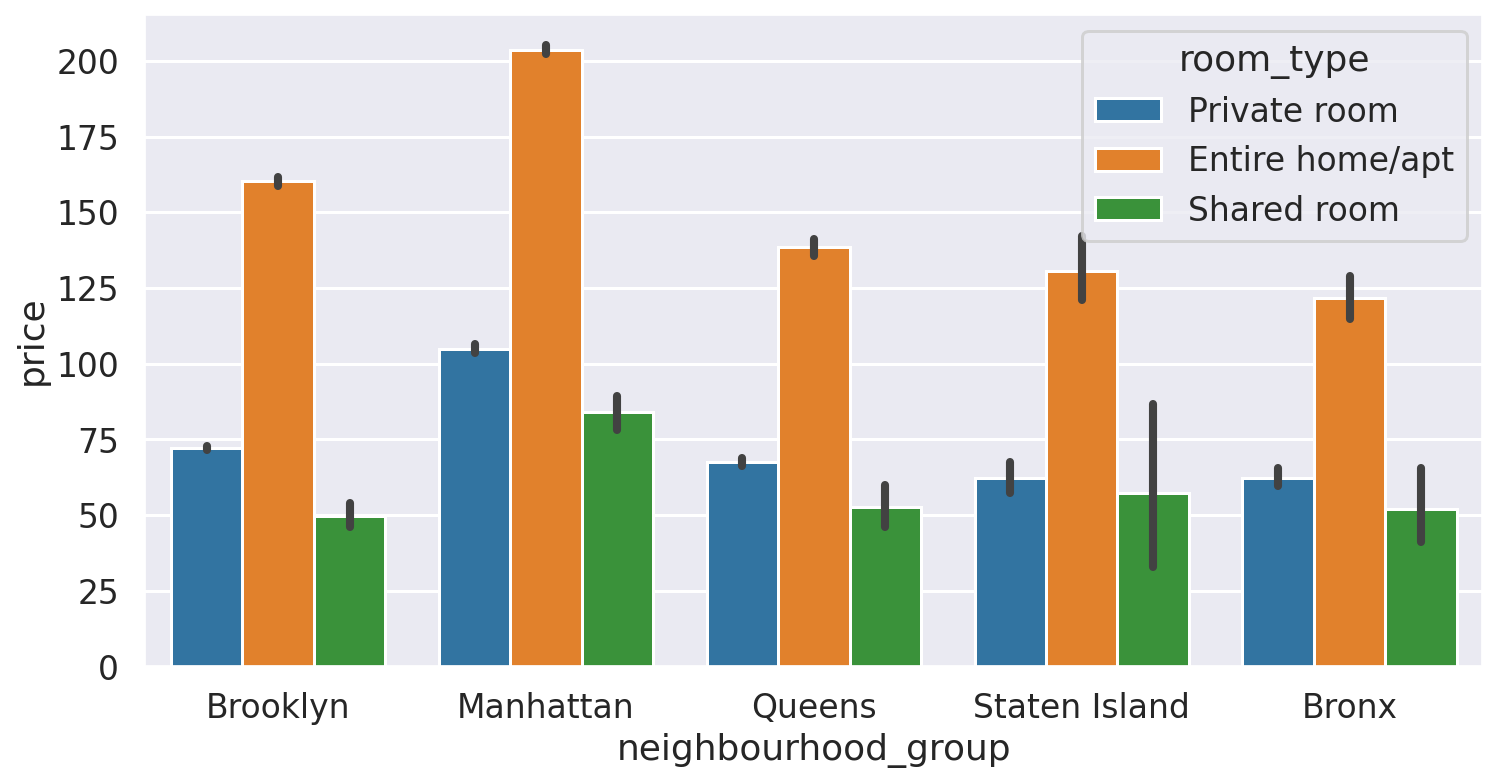

In [30]:
()# Visualize the distribution of the price and the neighbourhood_group by the room_type
plt.figure(figsize=(12, 6))
cp = sns.barplot(data=df, x='neighbourhood_group', y='price', hue='room_type')

### Final Data Cleaning

In [31]:
# Drop the columns that will not take part in the prediction
df.drop(['neighbourhood', 'reviews_per_month', 'availability_365'], axis=1, inplace=True)
df.rename({'calculated_host_listings_count': 'host_listings_count'}, axis=1, inplace=True)

### Ordinal Encoding

In [32]:
# Get the categorical features again
cat_cols = df.select_dtypes(include=np.object)

In [33]:
# Encode the categorical features
for col in cat_cols.columns:
    df[col] = df[col].factorize()[0]

In [34]:
# Examine the data after encoding
df.head()

,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,host_listings_count
0,0,0,149.0,1.0,9.0,3.5
1,1,1,225.0,1.0,45.0,2.0
2,1,0,150.0,3.0,0.0,1.0
3,0,1,89.0,1.0,58.5,1.0
4,1,1,80.0,10.0,9.0,1.0


### Correlation Map of the Features

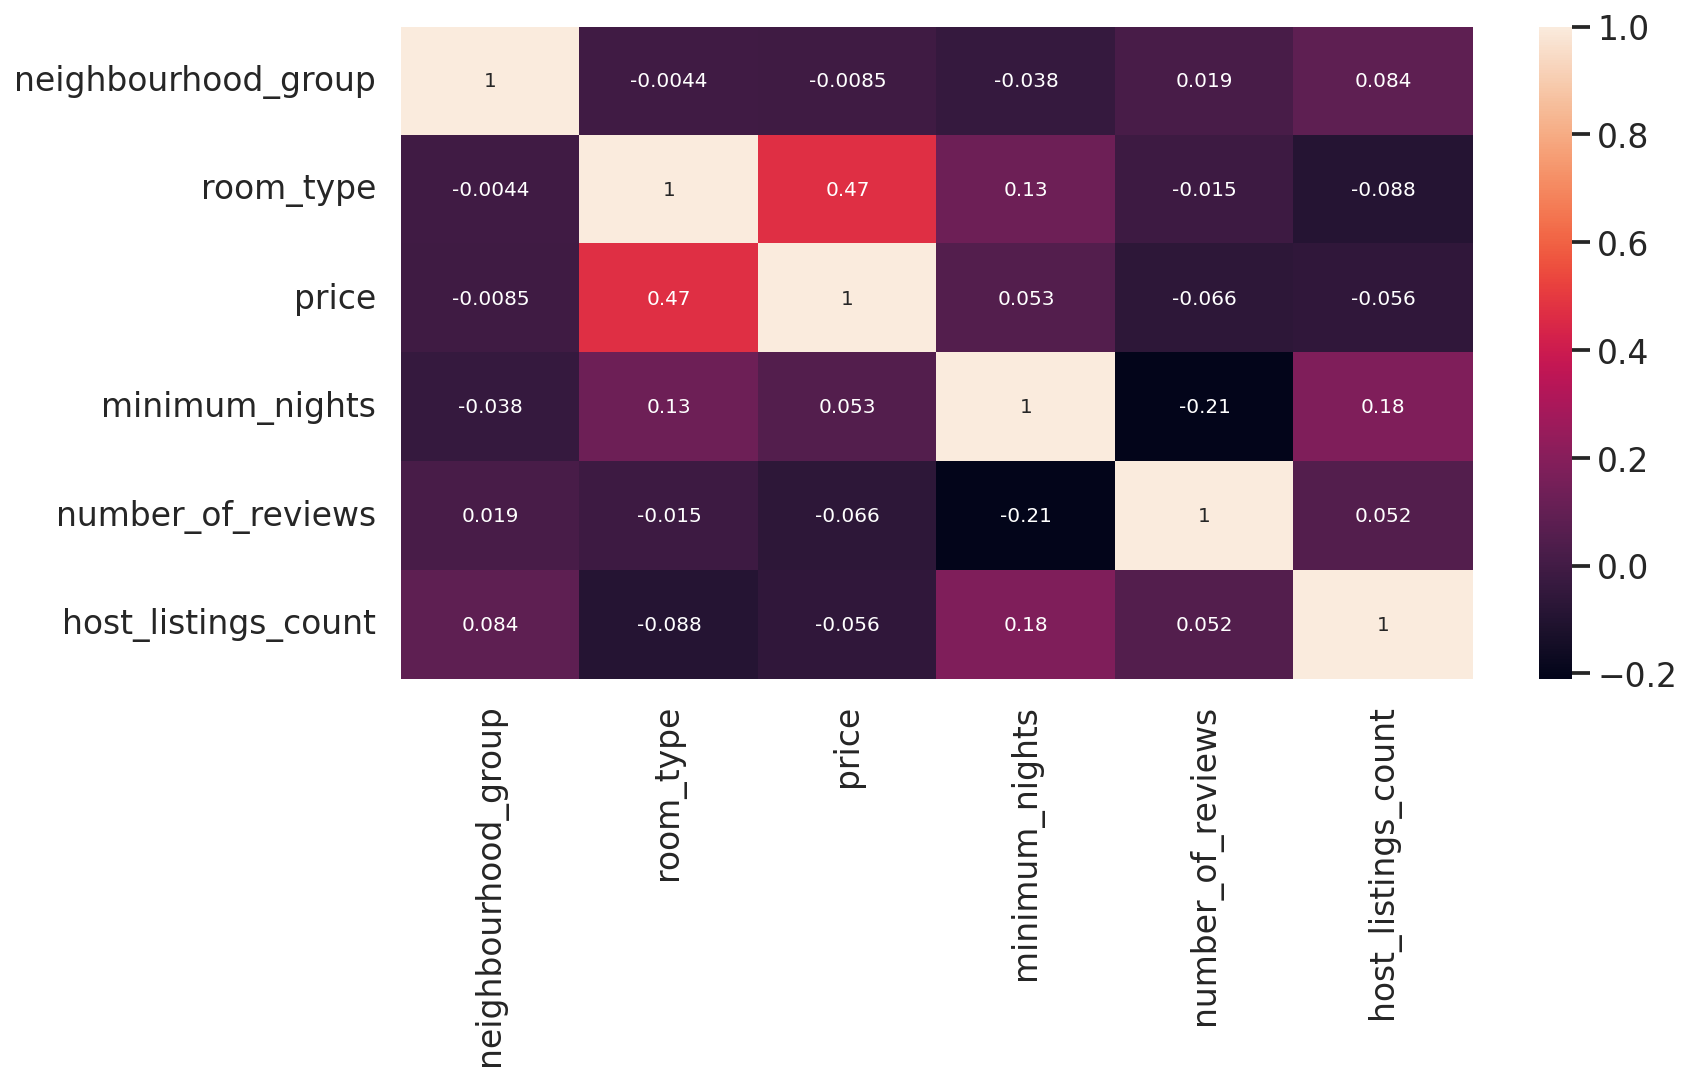

In [35]:
# Visualize correlation map of the features
plt.figure(figsize=(12, 6))
hm = sns.heatmap(df.corr(), annot=True)

## 5. Modeling and Prediction

### Definition of X and y

In [36]:
# Define the independent variables and dependent variable
X = df.drop(columns='price', axis=1)
y = df['price']

### Train Test Split

In [37]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### Modeling Preparation

In [38]:
# Define StandardScaler, KFold and PolynomialFeatures
s = StandardScaler()
kf = KFold(shuffle=True, random_state=42, n_splits=5)
pf = PolynomialFeatures(degree=3, include_bias=False)

### Linear Regression

In [39]:
# Linear Regression and K-fold cross validation
lr = LinearRegression()

estimator = Pipeline([('scaler', s), ('regression', lr)])
y_pred = cross_val_predict(estimator, X_train, y_train, cv=kf)
score = r2_score(y_train, y_pred)
rmse = np.sqrt(mean_squared_error(y_train, y_pred))

linear_results = pd.DataFrame({'R2 Score': [score], 'RMSE': [rmse]})
linear_results

,R2 Score,RMSE
0,0.222251,73.767782


### Lasso Regression

In [40]:
# Lasso Regression and K-fold cross validation
alphas = np.geomspace(0.02, 0.2, 10)

scores = []
errors = []
#y_pred = []
for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=100000)
    
    estimator = Pipeline([
        ('scaler', s),
        ('polynomial_features', pf),
        ('lasso_regression', lasso)])

    y_pred = cross_val_predict(estimator, X_train, y_train, cv=kf)
    
    score = r2_score(y_train, y_pred)
    rmse = np.sqrt(mean_squared_error(y_train, y_pred))

    scores.append(score)
    errors.append(rmse)

lasso_results = pd.DataFrame({'Alpha': alphas, 'R2 Score': scores, 'RMSE': errors})
lasso_results

,Alpha,R2 Score,RMSE
0,0.020000,0.438037,62.704808
1,0.025831,0.438047,62.704271
2,0.033362,0.438055,62.703833
3,0.043089,0.438058,62.703682
4,0.055651,0.438051,62.704068
5,0.071876,0.438012,62.706246
6,0.092832,0.437945,62.709936
7,0.119897,0.437839,62.715899
8,0.154853,0.437631,62.727492
9,0.200000,0.437250,62.748721


### Ridge Regression

In [41]:
# ridge regression and K-fold cross validation
alphas = np.geomspace(5, 50, 10)

scores=[]
errors = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha, max_iter=100000)

    estimator = Pipeline([
        ('scaler', s),
        ('polynomial_features', pf),
        ('ridge_regression', ridge)])

    y_pred = cross_val_predict(estimator, X_train, y_train, cv=kf)

    score = r2_score(y_train, y_pred)
    rmse = np.sqrt(mean_squared_error(y_train, y_pred))

    scores.append(score)
    errors.append(rmse)

ridge_results = pd.DataFrame({'Alpha': alphas, 'R2 Score': scores, 'RMSE': errors})
ridge_results

,Alpha,R2 Score,RMSE
0,5.000000,0.437992,62.707329
1,6.457748,0.437993,62.707286
2,8.340503,0.437994,62.707233
3,10.772173,0.437995,62.707169
4,13.912797,0.437996,62.707096
5,17.969068,0.437998,62.707015
6,23.207944,0.437999,62.706933
7,29.974213,0.438000,62.706864
8,38.713184,0.438001,62.706837
9,50.000000,0.438000,62.706898


### Comparing the Results

In [42]:
cross_table = pd.DataFrame({
      'Model': ['Linear', 'Lasso', 'Ridge'],
      'R2 Score': [linear_results['R2 Score'][0], lasso_results['R2 Score'][3], ridge_results['R2 Score'][8]],
      'RMSE': [linear_results['RMSE'][0], lasso_results['RMSE'][3], ridge_results['RMSE'][8]],
      })
cross_table

,Model,R2 Score,RMSE
0,Linear,0.222251,73.767782
1,Lasso,0.438058,62.703682
2,Ridge,0.438001,62.706837


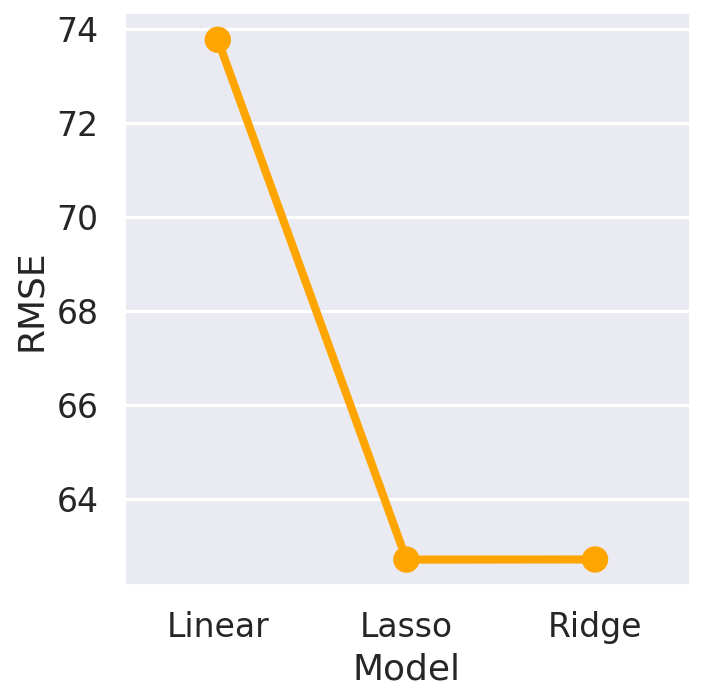

In [43]:
sns.catplot(data=cross_table, x='Model', y='RMSE', linestyles=['-'], color ='orange', kind='point');

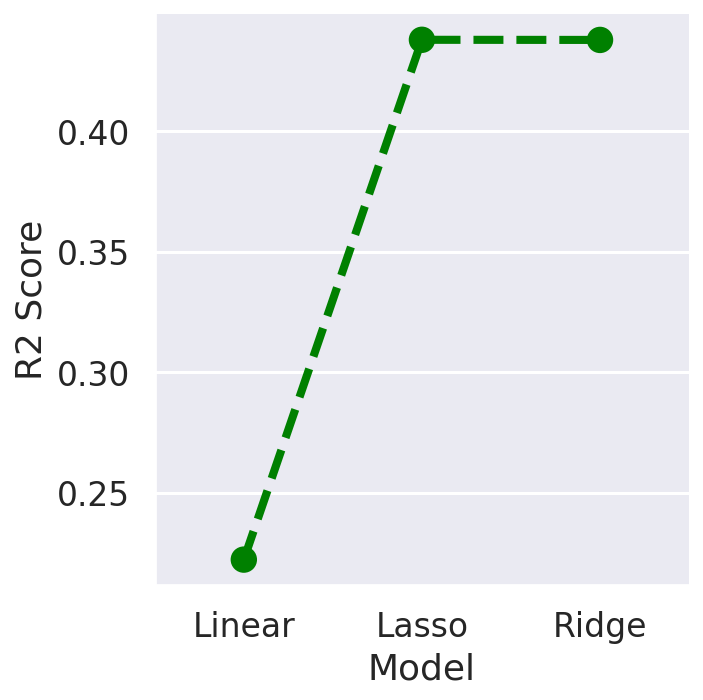

In [44]:
sns.catplot(data=cross_table, x='Model', y='R2 Score', linestyles=['--'], color ='green', kind='point');

### Prediction

In [45]:
# Use Lasso Regression on the whole training set
lasso = Lasso(alpha = 0.043, max_iter = 100000)
best_estimator = Pipeline([
              ('scaler', s), 
              ('polynomial_features', pf),
              ('lasso_regression', lasso)])
best_estimator.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial_features',
                 PolynomialFeatures(degree=3, include_bias=False,
                                    interaction_only=False, order='C')),
                ('lasso_regression',
                 Lasso(alpha=0.043, copy_X=True, fit_intercept=True,
                       max_iter=100000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)

In [46]:
# Run prediction and get the score
y_pred = best_estimator.predict(X_test)
score = best_estimator.score(X_test, y_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

pred_results = pd.DataFrame({'R2 Score': [score], 'RMSE': [rmse]})
pred_results

,R2 Score,RMSE
0,0.435035,62.542625


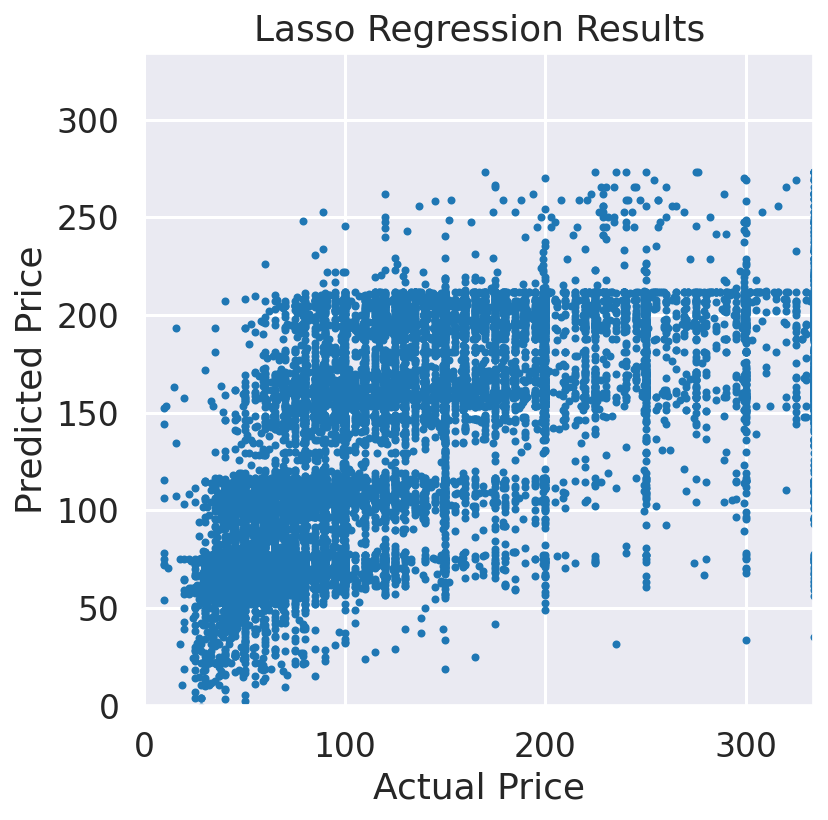

In [47]:
# Visualize the predicted price vs the actual price
f = plt.figure(figsize=(6, 6))
ax = plt.axes()

ax.plot(y_test, y_pred, marker='o', ls='', ms=3.0)

lim = (0, y_test.max())

ax.set(xlabel='Actual Price', 
       ylabel='Predicted Price', 
       xlim=lim,
       ylim=lim,
       title='Lasso Regression Results');

**Conclusion:**
- Both Lasso and Ridge with proper hyperparameter tuning give better results than the plain Linear Regression.
- Lasso gives the smallest Root Mean Square Error, however the difference in scores and errors are not significant and almost identical.
- The best candidate based on Root Mean Square Error and R2 Score results is Lasso Regression.